In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


# 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Read Data

In [4]:
df = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [5]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.drop(columns=['id'], inplace=True)

In [7]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
df.shape

(5110, 11)

In [9]:
df.describe

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


<bound method NDFrame.describe of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_ty

In [10]:
df.info

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


<bound method DataFrame.info of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type

In [11]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
 df.duplicated().sum()

0

## Drop duplicates


In [13]:
df.drop_duplicates(inplace=True)

## Fill Null values

In [14]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# visualization

## What is the distribution of age among patients?

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


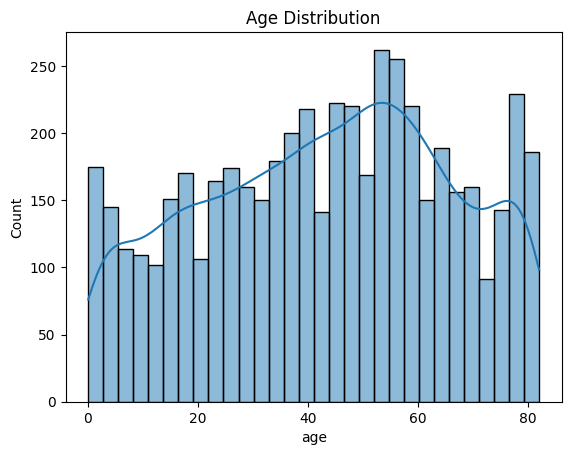

In [15]:
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

## What is the distribution of average glucose level?

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


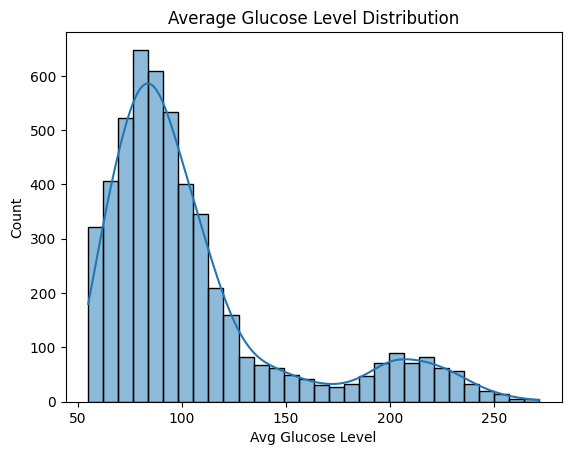

In [16]:
sns.histplot(df["avg_glucose_level"], bins=30, kde=True)
plt.title("Average Glucose Level Distribution")
plt.xlabel("Avg Glucose Level")
plt.ylabel("Count")
plt.show()

## What is the distribution of BMI?

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


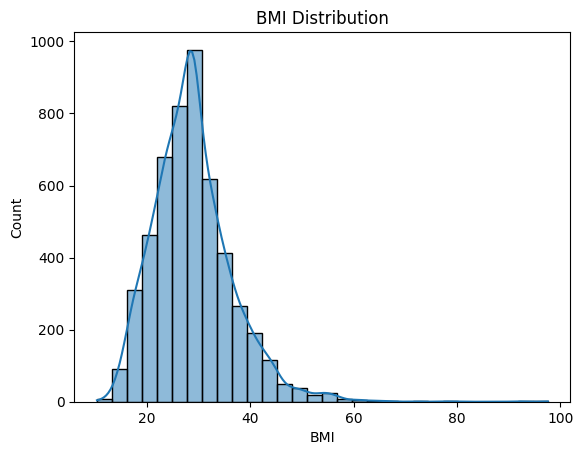

In [17]:
sns.histplot(df["bmi"], bins=30, kde=True)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

## Are there any outliers in BMI values?

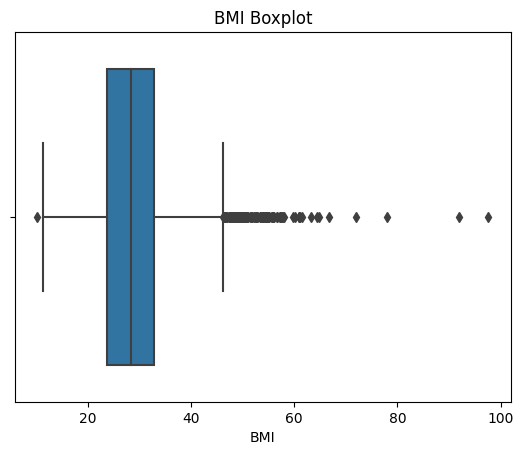

In [18]:
sns.boxplot(x=df["bmi"])
plt.title("BMI Boxplot")
plt.xlabel("BMI")
plt.show()

## Stroke vs Other Features

## Does age affect the likelihood of having a stroke?

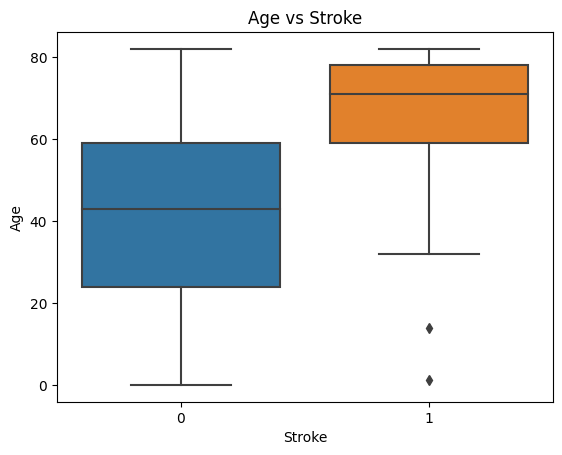

In [19]:
sns.boxplot(x="stroke", y="age", data=df)
plt.title("Age vs Stroke")
plt.xlabel("Stroke")
plt.ylabel("Age")
plt.show()

## Does stroke frequency vary by gender?

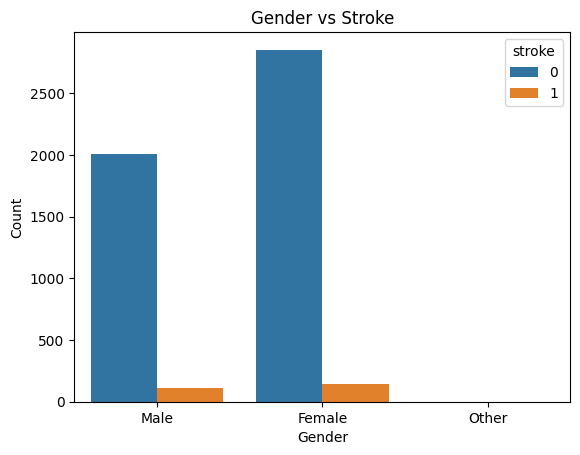

In [20]:
sns.countplot(x="gender", hue="stroke", data=df)
plt.title("Gender vs Stroke")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

## Are married individuals more likely to have a stroke?

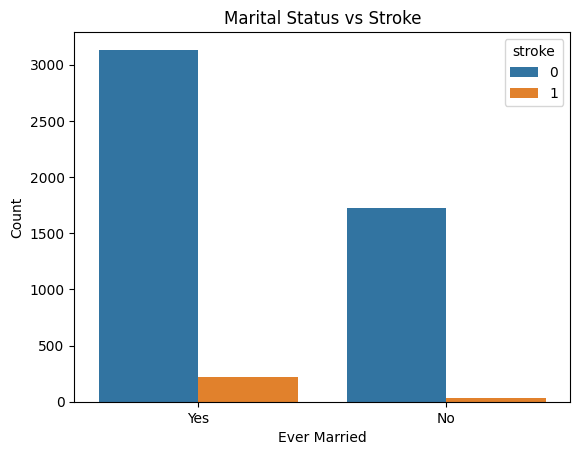

In [21]:
sns.countplot(x="ever_married", hue="stroke", data=df)
plt.title("Marital Status vs Stroke")
plt.xlabel("Ever Married")
plt.ylabel("Count")
plt.show()

## Does work type have any impact on stroke occurrence?

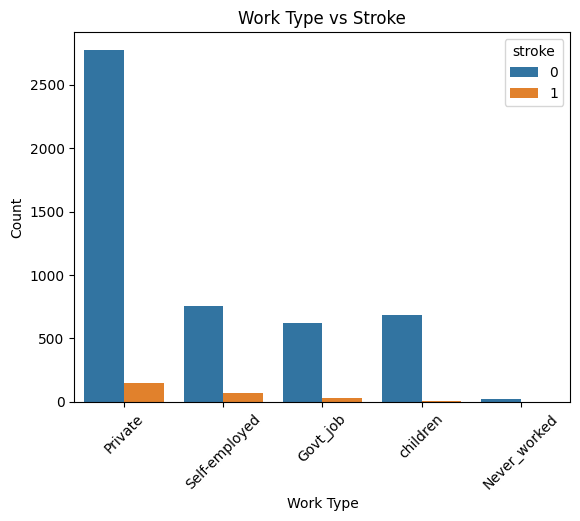

In [22]:
sns.countplot(x="work_type", hue="stroke", data=df)
plt.title("Work Type vs Stroke")
plt.xlabel("Work Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Does living in urban or rural areas affect stroke risk?

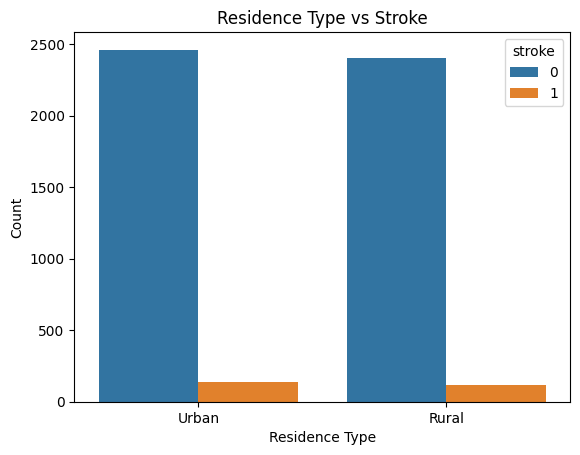

In [23]:
sns.countplot(x="Residence_type", hue="stroke", data=df)
plt.title("Residence Type vs Stroke")
plt.xlabel("Residence Type")
plt.ylabel("Count")
plt.show()

## Does smoking increase the risk of stroke?

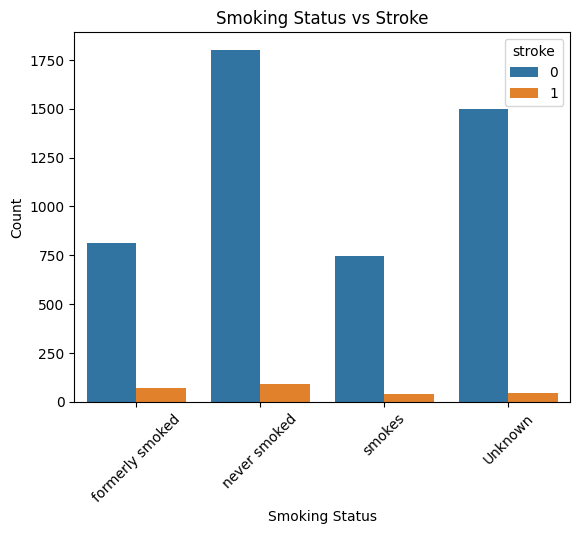

In [24]:
sns.countplot(x="smoking_status", hue="stroke", data=df)
plt.title("Smoking Status vs Stroke")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

##  Combined Feature Relationships

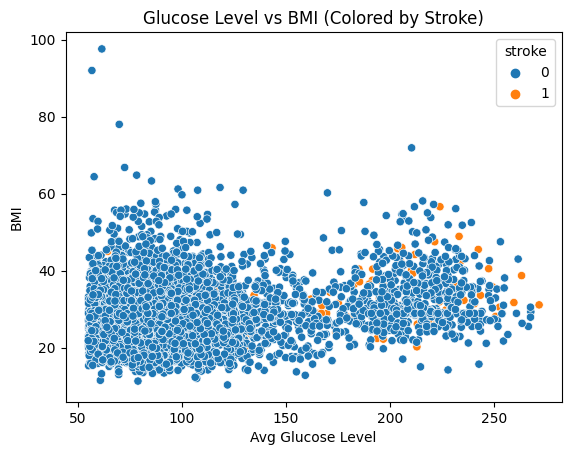

In [25]:
sns.scatterplot(x="avg_glucose_level", y="bmi", hue="stroke", data=df)
plt.title("Glucose Level vs BMI (Colored by Stroke)")
plt.xlabel("Avg Glucose Level")
plt.ylabel("BMI")
plt.show()

## How does age vary across work types and stroke status?

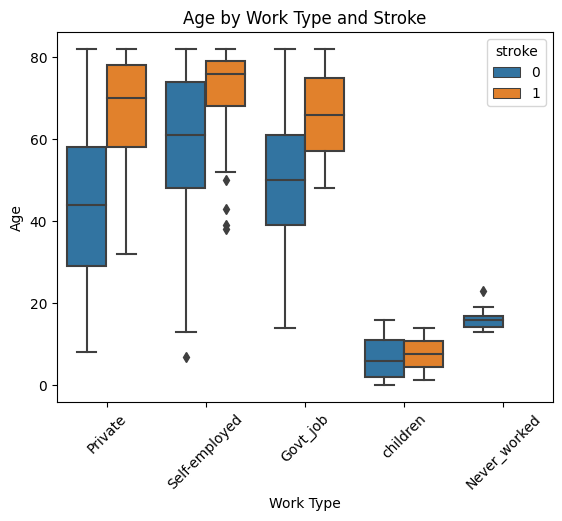

In [26]:
sns.boxplot(x="work_type", y="age", hue="stroke", data=df)
plt.title("Age by Work Type and Stroke")
plt.xlabel("Work Type")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()


## Correlation Matrix

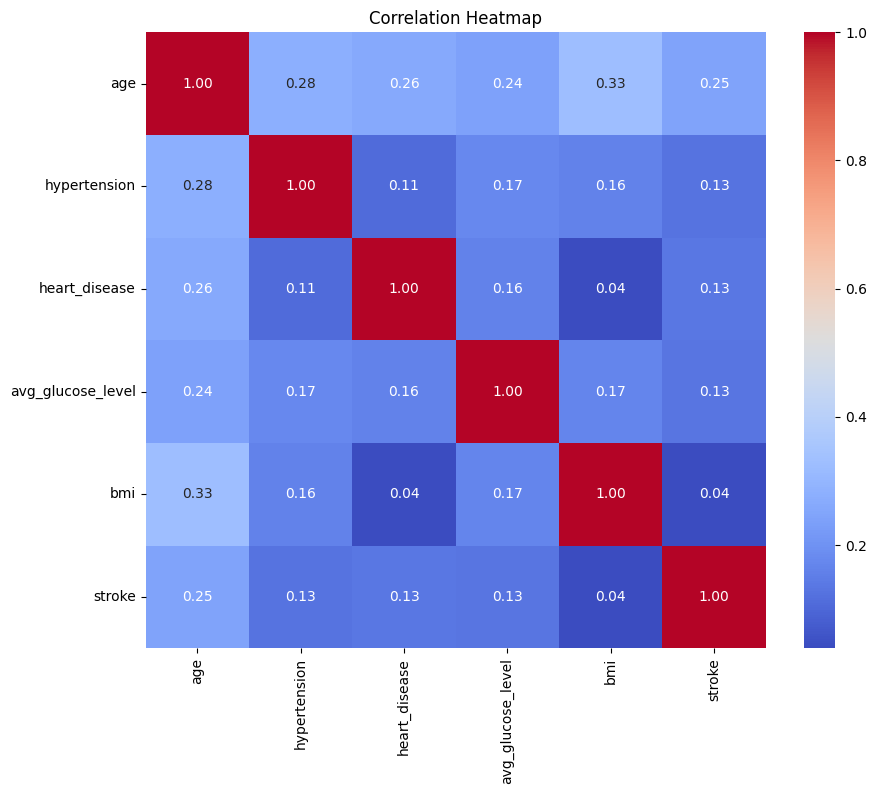

In [27]:
# Convert stroke to numeric if not already
df["stroke"] = pd.to_numeric(df["stroke"], errors="coerce")

# Select only numeric columns
numeric_df = df.select_dtypes(include=["float64", "int64"])

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# 3. Preprocessing

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


## Encode categorical variables


In [30]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [55]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


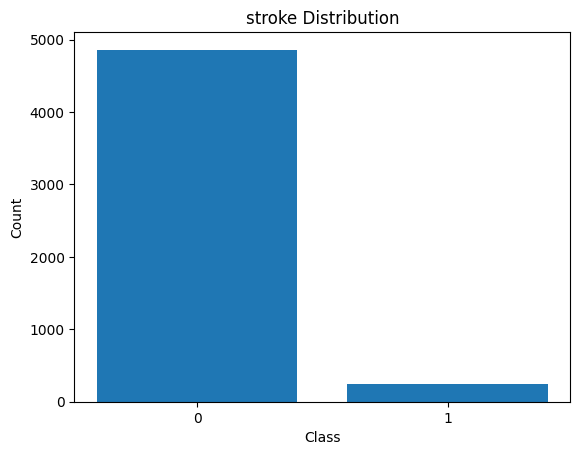

In [32]:
X=df.drop(["stroke"],axis=1)
y=df["stroke"]

count_class = y.value_counts() # Count the occurrences of each class
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('stroke Distribution')
plt.xticks(count_class.index, ['0', '1'])
plt.show()

## Balance Data using SMOTE


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

In [34]:
!pip install --upgrade scikit-learn imbalanced-learn


In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [37]:
print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Before SMOTE:
stroke
0    3889
1     199
Name: count, dtype: int64

After SMOTE:
stroke
0    3889
1    3889
Name: count, dtype: int64


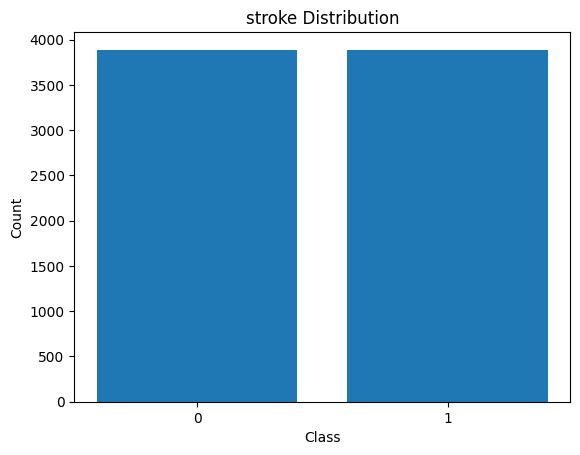

In [57]:
count_class = y_train_resampled.value_counts()
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('stroke Distribution')
plt.xticks(count_class.index, ['0', '1'])
plt.show()

# Train Models

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append([model_name, accuracy, precision, recall, f1])


In [45]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.785714,0.149378,0.72,0.247423
1,Naive Bayes,0.717221,0.102990,0.62,0.176638
2,KNN,0.794521,0.087629,0.34,0.139344
3,Decision Tree,0.860078,0.109244,0.26,0.153846
4,Random Forest,0.899217,0.136986,0.20,0.162602
5,SVM,0.787671,0.107981,0.46,0.174905


In [50]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

best_model = RandomForestClassifier()
best_model.fit(X_train_scaled, y_train_resampled)
y_pred_best = best_model.predict(X_test_scaled)


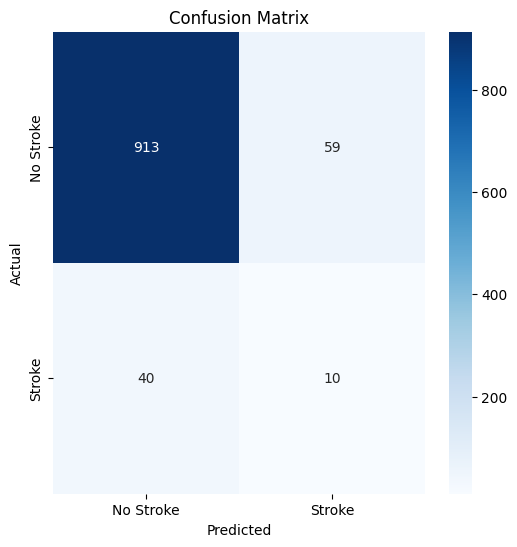

In [51]:
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [53]:
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.14      0.20      0.17        50

    accuracy                           0.90      1022
   macro avg       0.55      0.57      0.56      1022
weighted avg       0.92      0.90      0.91      1022

